# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque

ModuleNotFoundError: No module named 'xgboost'

# Importing the Dataset

In [2]:
df = pd.read_csv('Postures.csv')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


# EDA

We can see that the first row (0th row) has all its values as 0, so there will be no issues removing this row as it is not giving any intuition.

In [3]:
df.drop(0, inplace=True)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


#### We shall start by observing the attributes and then draw conclusions on how these features are behaving and impacting our target.

#### As we know that 36 out of the 38 features represent coordinates, a statistical summary is the need of the hour.

In [4]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null object
Y3       78095 non-null object
Z3       78095 non-null object
X4       78095 non-null object
Y4       78095 non-null object
Z4       78095 non-null object
X5       78095 non-null object
Y5       78095 non-null object
Z5       78095 non-null object
X6       78095 non-null object
Y6       78095 non-null object
Z6       78095 non-null object
X7       78095 non-null object
Y7       78095 non-null object
Z7       78095 non-null object
X8       78095 non-null object
Y8       78095 non-null object
Z8       78095 n

#### No null values but it is clear we have numerous missing values, before proceeding lets handle them first.

#### We first convert the '?' to null values

In [6]:
df.replace('?',np.nan, inplace=True)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the percentage of missing data, this will give us an intuition of what we are actually dealing with.

In [12]:
for i in df.columns:
    a = df[i].isnull().sum()/len(df)*100
    print(i,'-',a.round(2),'%')

Class - 0.0 %
User - 0.0 %
X0 - 0.0 %
Y0 - 0.0 %
Z0 - 0.0 %
X1 - 0.0 %
Y1 - 0.0 %
Z1 - 0.0 %
X2 - 0.0 %
Y2 - 0.0 %
Z2 - 0.0 %
X3 - 0.88 %
Y3 - 0.88 %
Z3 - 0.88 %
X4 - 4.0 %
Y4 - 4.0 %
Z4 - 4.0 %
X5 - 16.68 %
Y5 - 16.68 %
Z5 - 16.68 %
X6 - 33.1 %
Y6 - 33.1 %
Z6 - 33.1 %
X7 - 50.13 %
Y7 - 50.13 %
Z7 - 50.13 %
X8 - 60.86 %
Y8 - 60.86 %
Z8 - 60.86 %
X9 - 69.31 %
Y9 - 69.31 %
Z9 - 69.31 %
X10 - 81.11 %
Y10 - 81.11 %
Z10 - 81.11 %
X11 - 99.96 %
Y11 - 99.96 %
Z11 - 99.96 %


Wow! Thats a whole lot of nulls, specially in the last few features. I guess this tells us a little about the markers placed. Before we conclude on how to deal with these nulls lets have a look and try to find intuitions from other features as well.

#### Lets start with our target.

In [13]:
df['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

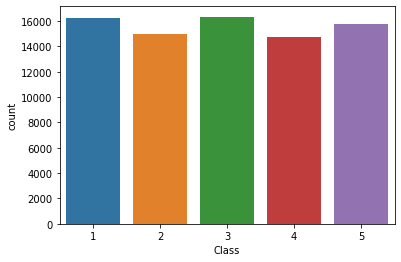

In [14]:
sns.countplot(df['Class'])
plt.show()

There is no imbalance in the classes. That surely is goodnews as imbalance can lead to biasness in the results.

In [15]:
df['User'].value_counts(sort=False)

0     9048
1     4717
2     4513
4      379
5     5105
6     4377
7      492
8     6811
9     3920
10    9573
11    8061
12    4865
13    8739
14    7495
Name: User, dtype: int64

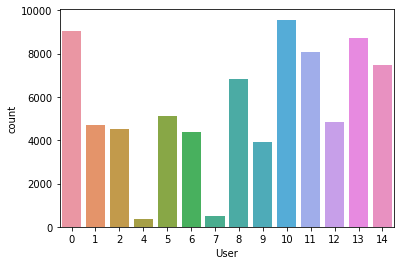

In [16]:
sns.countplot(df['User'])
plt.show()

#### There are 14 different users. We have user number 3 missing from between. Also user 4 and 7 have very less number of values so we will remove them and proceed as these two users have very less values and also our problem statement consists of 12 users only

In [17]:
df = df[df['User']!=4]
df = df[df['User']!=7]
df['User'].value_counts(sort=False)

0     9048
1     4717
2     4513
5     5105
6     4377
8     6811
9     3920
10    9573
11    8061
12    4865
13    8739
14    7495
Name: User, dtype: int64

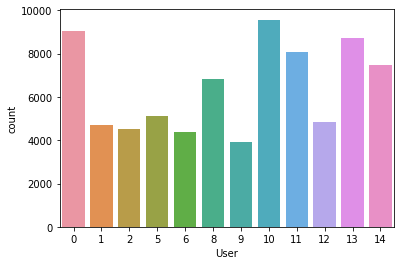

In [18]:
sns.countplot(df['User'])
plt.show()

#### Implementing with a basic median imputation for the null values treatment:

In [19]:
df1 = df.copy()

In [20]:
for i in df1.columns:
    df1[i].fillna(df1[i].median(), inplace=True)

In [21]:
for i in df1.columns:
    a = df1[i].isnull().sum()/len(df1)*100
    print(i,'-',a.round(2),'%')

Class - 0.0 %
User - 0.0 %
X0 - 0.0 %
Y0 - 0.0 %
Z0 - 0.0 %
X1 - 0.0 %
Y1 - 0.0 %
Z1 - 0.0 %
X2 - 0.0 %
Y2 - 0.0 %
Z2 - 0.0 %
X3 - 0.0 %
Y3 - 0.0 %
Z3 - 0.0 %
X4 - 0.0 %
Y4 - 0.0 %
Z4 - 0.0 %
X5 - 0.0 %
Y5 - 0.0 %
Z5 - 0.0 %
X6 - 0.0 %
Y6 - 0.0 %
Z6 - 0.0 %
X7 - 0.0 %
Y7 - 0.0 %
Z7 - 0.0 %
X8 - 0.0 %
Y8 - 0.0 %
Z8 - 0.0 %
X9 - 0.0 %
Y9 - 0.0 %
Z9 - 0.0 %
X10 - 0.0 %
Y10 - 0.0 %
Z10 - 0.0 %
X11 - 0.0 %
Y11 - 0.0 %
Z11 - 0.0 %


### Now we are done with handling null values, we can proceed further. To be on the safe side lets check the dataset again for any abnormalities so that we get a clean data for our algorithms.

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77224 entries, 1 to 78095
Data columns (total 38 columns):
Class    77224 non-null int64
User     77224 non-null int64
X0       77224 non-null float64
Y0       77224 non-null float64
Z0       77224 non-null float64
X1       77224 non-null float64
Y1       77224 non-null float64
Z1       77224 non-null float64
X2       77224 non-null float64
Y2       77224 non-null float64
Z2       77224 non-null float64
X3       77224 non-null object
Y3       77224 non-null object
Z3       77224 non-null object
X4       77224 non-null object
Y4       77224 non-null object
Z4       77224 non-null object
X5       77224 non-null object
Y5       77224 non-null object
Z5       77224 non-null object
X6       77224 non-null object
Y6       77224 non-null object
Z6       77224 non-null object
X7       77224 non-null object
Y7       77224 non-null object
Z7       77224 non-null object
X8       77224 non-null object
Y8       77224 non-null object
Z8       77224 n

### We can see that there are some columns with object as their data type. So, the most probable case scenario would be the values in some of the features are input as string by mistake. We need to correct this:

In [23]:
for i in df1.columns.drop(['Class','User']):
    df1[i] = df1[i].astype(float)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77224 entries, 1 to 78095
Data columns (total 38 columns):
Class    77224 non-null int64
User     77224 non-null int64
X0       77224 non-null float64
Y0       77224 non-null float64
Z0       77224 non-null float64
X1       77224 non-null float64
Y1       77224 non-null float64
Z1       77224 non-null float64
X2       77224 non-null float64
Y2       77224 non-null float64
Z2       77224 non-null float64
X3       77224 non-null float64
Y3       77224 non-null float64
Z3       77224 non-null float64
X4       77224 non-null float64
Y4       77224 non-null float64
Z4       77224 non-null float64
X5       77224 non-null float64
Y5       77224 non-null float64
Z5       77224 non-null float64
X6       77224 non-null float64
Y6       77224 non-null float64
Z6       77224 non-null float64
X7       77224 non-null float64
Y7       77224 non-null float64
Z7       77224 non-null float64
X8       77224 non-null float64
Y8       77224 non-null float64

### Now as we have sorted this out we can make some plots and try to get some intuitions from the data.

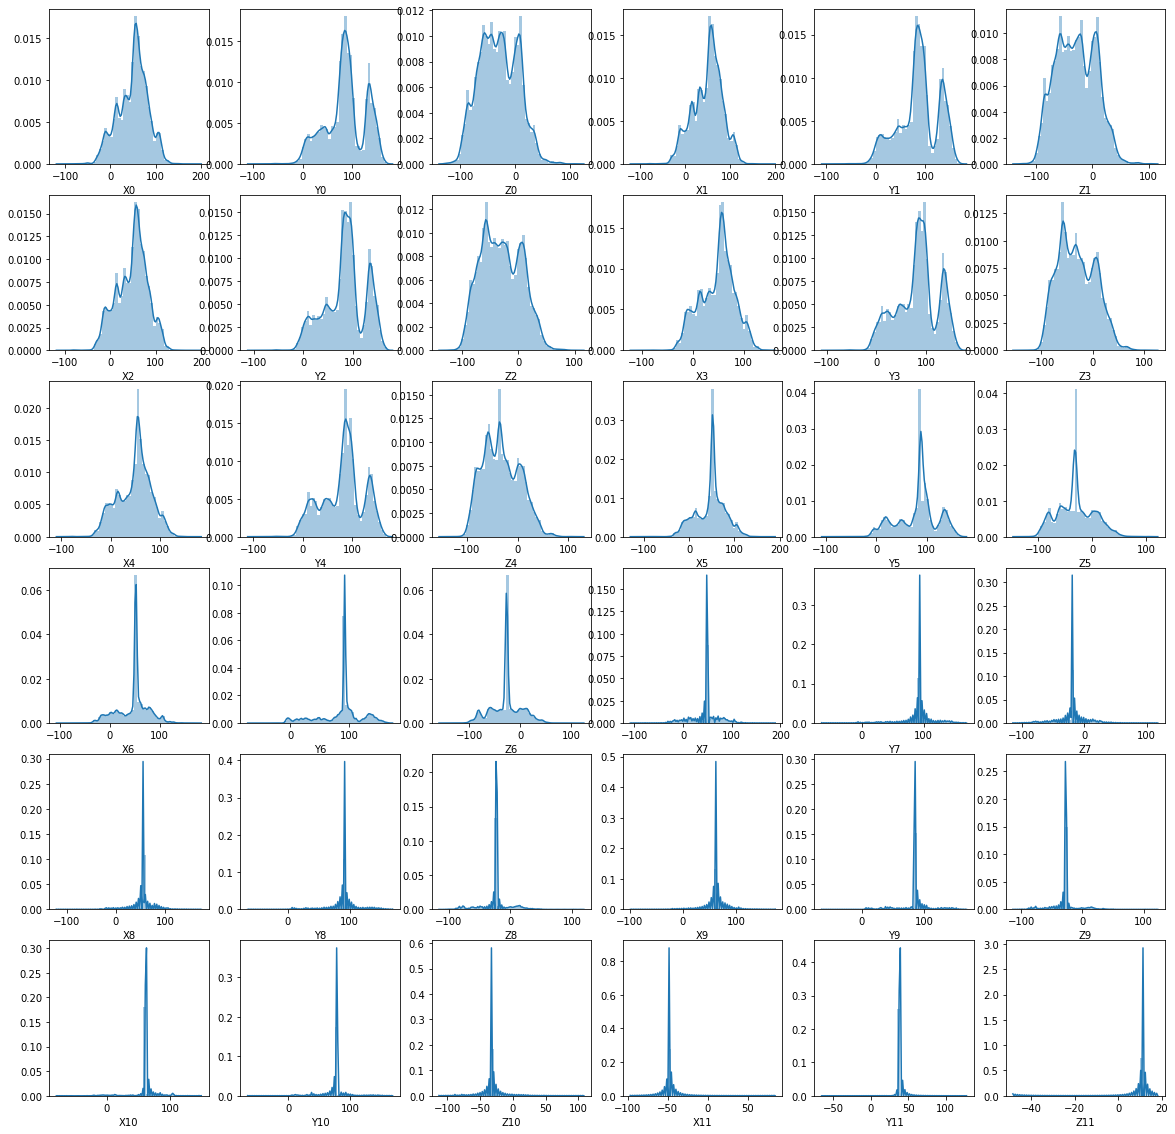

In [25]:
fig, axes = plt.subplots(6,6, figsize=(20,20))
axes = axes.flatten()

for i in range(len(df1.drop(['Class','User'], axis=1).columns)):
    sns.distplot(df1.iloc[:,i+2], ax=axes[i])
    
plt.show()

### Intuition:

There are a lot of features towards the second half of the dataset which are concentrated near one value, the reason for this is the imputation we had used. As these features had most of their data missing we had imputed values at their places resulting in a distribution concentrated near one value.

#### We can also recheck this result by scaling the data first.

### Lets give a look at the outliers also:

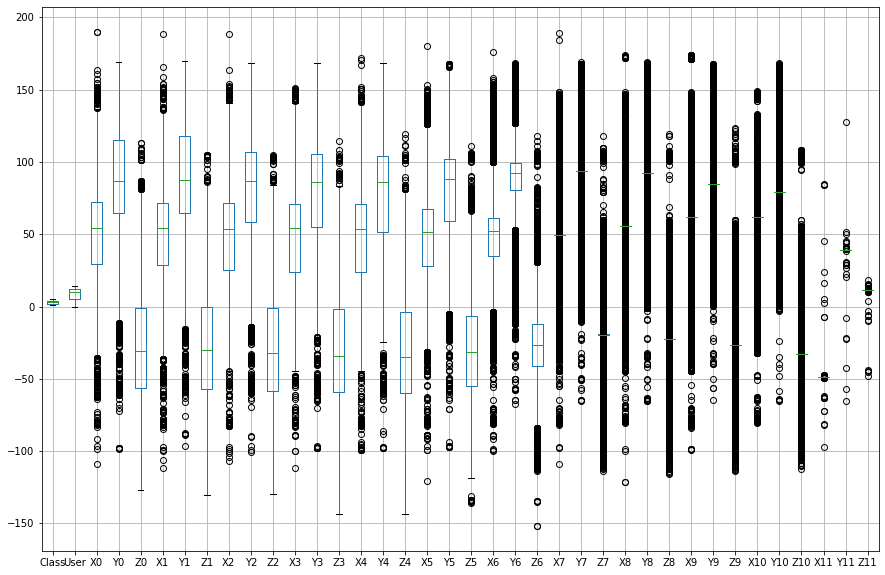

In [26]:
df1.boxplot(figsize=(15,10))
plt.show()

#### Astonishing!! The outliers are more seen than the data itself. In some of the features it is almost impossible to determine the Q1 and Q3 values.
We will deal with treatment of the outliers later anf if they are really hindering with the performance of the model.

### Heat Map

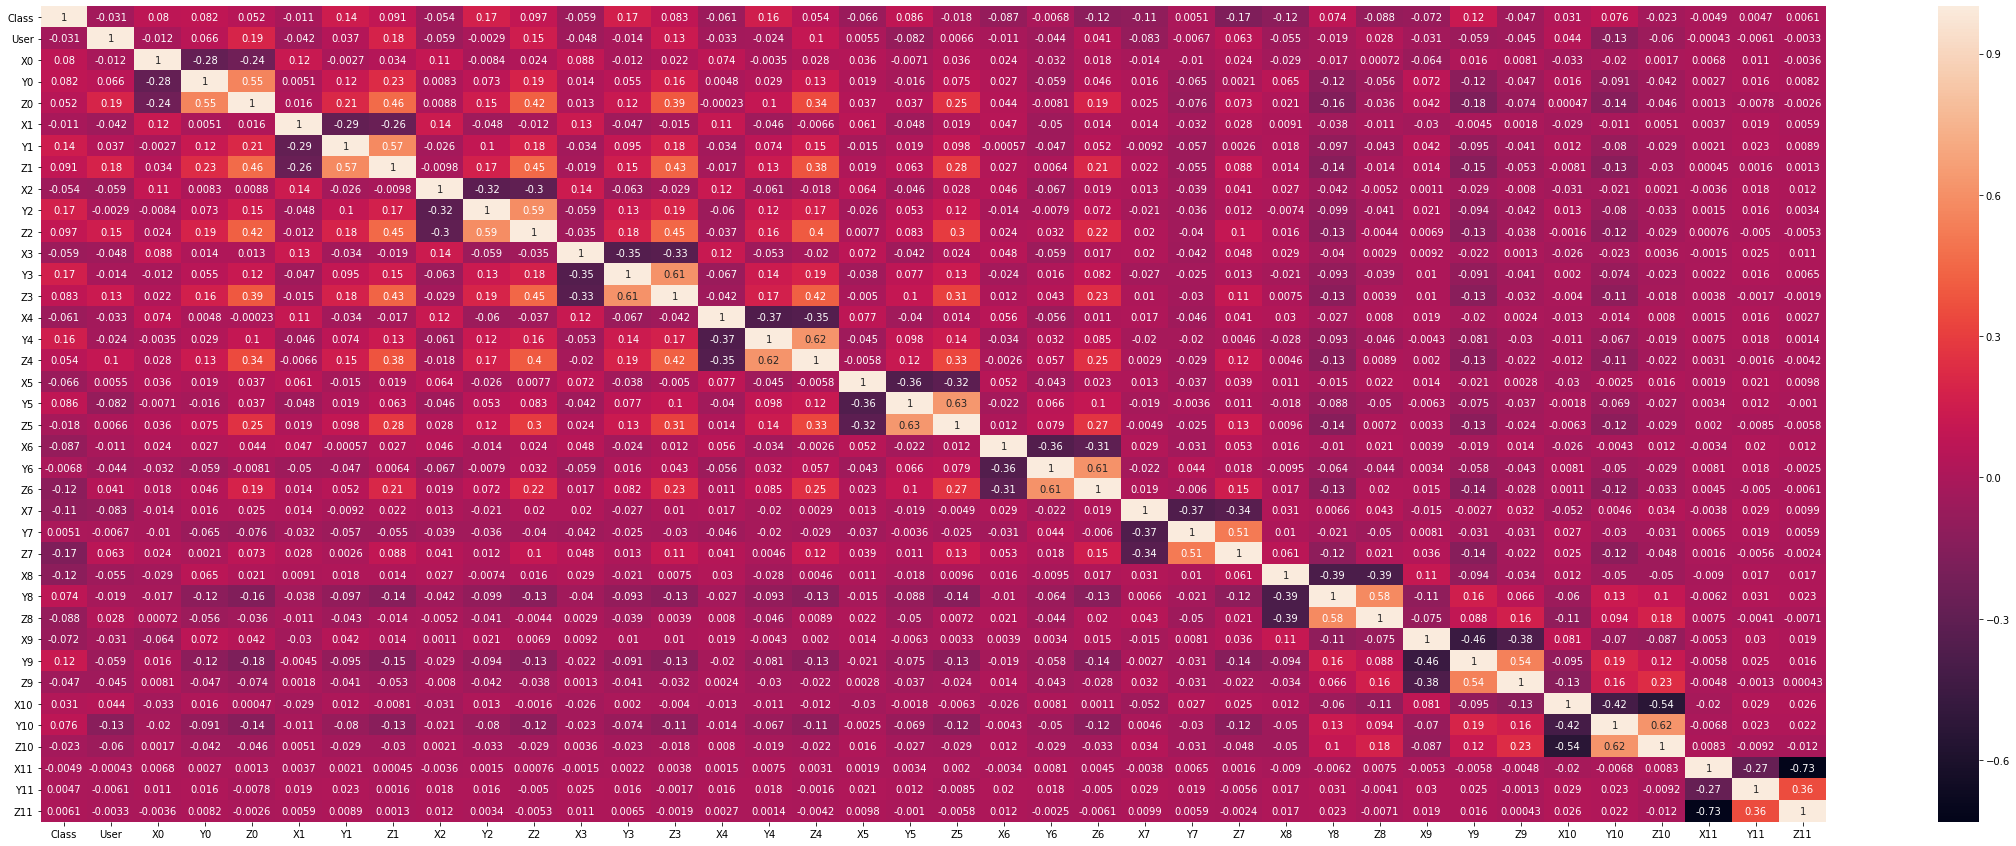

In [27]:
plt.figure(figsize=(40,15))
sns.heatmap(df1.corr(), annot=True)
plt.show()

#### The features X11 and Z10 are highly correlated, also X10 and Z10, a few more probably. In my opinion it was something inevitable due to the large number of nulls and the imputation done. 
#### Also it should be kept in mind that these are actually cordinates and movement of any two markers can exhibit similar pattern, even can overlap each other.

### We have cleaned a portion of the data as of now, we will check how our models perform and with due need clean the data further to see the changes in the result.

### Result Visualization:
#### In order to visualize the reults and to get proper intuitions from them we would use Mosaic plot for our dataset which is defined below:

In [28]:
def mosaic_plot(results):
    def split_list(x):
        return [a[i:i+x] for i in range(0, len(a), x)]
    
    a = []
    for i in range(5):
        for j in range(5):
            a.append(results[i][j])
    
    results = split_list(5)
    
    n_classes = 5
    class_lists = [range(1,n_classes+1)]*2
    mosaic_tuples = tuple(itertools.product(*class_lists))
    
    res_list = results[0]
    for i,j in enumerate(results):
        if i==0:
            pass
        else:
            tmp = deque(j)
            tmp.rotate(-i)
            res_list.extend(tmp)
    data = {t:res_list[i]+1 for i,t in (enumerate(mosaic_tuples))}

    fig, ax = plt.subplots(figsize=(4, 4))
    plt.rcParams.update({'font.size': 16})

    font_color = '#2c3e50'
    pallet = [
        'sandybrown', 
        'lightgreen', 
        'skyblue', 
        'lightslategray',
        'mediumpurple'
    ]
    colors = deque(pallet[:n_classes])
    all_colors = []
    for i in range(n_classes):
        if i > 0:
            colors.rotate(-1)
        all_colors.extend(colors)

    props = {(str(a), str(b)):{'color':all_colors[i]} for i,(a, b) in enumerate(mosaic_tuples)}

    labelizer = lambda k: ''

    p = mosaic(data, labelizer=labelizer, properties=props, ax=ax)

    title_font_dict = {
        'fontsize': 20,
        'color' : font_color,
    }
    axis_label_font_dict = {
        'fontsize': 16,
        'color' : font_color,
    }

    ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax.axes.yaxis.set_ticks([])
    ax.tick_params(axis='x', which='major', labelsize=14)

    ax.set_title('Classification Report')
    ax.set_xlabel('Observed Class')
    ax.set_ylabel('Predicted Class')

    legend_elements = [Patch(facecolor=all_colors[i], label='Class {}'.format(i+1)) for i in range(n_classes)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1,1.018))

    plt.tight_layout()
    plt.show()

#### In the above defined function the "results" refer to the confusion matrix.

### Trying Leave-One-User out split:
#### The problem statement itself had the requirement of using one user split instead of train test split,  makes sense as the users are the independent feature on which the class prediction will depend, so checking the result user wise will give more intuition rather than going on with train test split.

In [29]:
scores1 = []
scores2 = []
matrix = []

for i in df1['User'].unique():
    X_test = df1.drop('Class', axis=1)[df1['User'] == i]
    X_train = df1.drop('Class', axis=1)[df1['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df1['Class'][df1['User'] == i]
    y_train = df1['Class'][df1['User'] != i]
    
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    y_pred = log.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_matrix)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.4837533156498674
The f1 score for the User 0 is: 0.4624511232003161
[[1595    0  119  130   28]
 [ 130  780   94   47  450]
 [ 346   18  642  780   65]
 [1073    2   53  123  530]
 [ 514  207    2   83 1237]]


The accuracy score for the User 1 is: 0.56624973500106
The f1 score for the User 1 is: 0.570866602110476
[[1306    0    0    1    0]
 [   0  458    6   10  322]
 [  60   14  516  366   12]
 [   0   82    2  205  272]
 [  76   14  280  529  186]]


The accuracy score for the User 2 is: 0.558386882339907
The f1 score for the User 2 is: 0.4640899523570595
[[1076    0   27   95    0]
 [   0  793    3    7    5]
 [   0    0   51  670    0]
 [   0    0   78  599    0]
 [  29  774   80  225    1]]


The accuracy score for the User 5 is: 0.5245837414299707
The f1 score for the User 5 is: 0.478471566361719
[[   0   96    0    0  724]
 [   0 1143    0    0    0]
 [   3    0  733   53  137]
 [   8    2  157  342  524]
 [   5  696    0   22  460]]


T

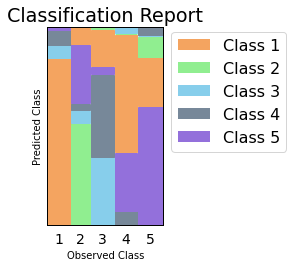

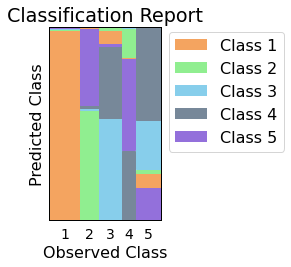

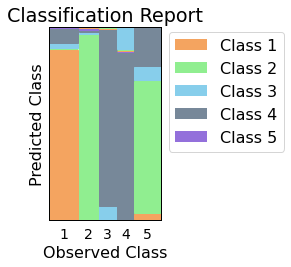

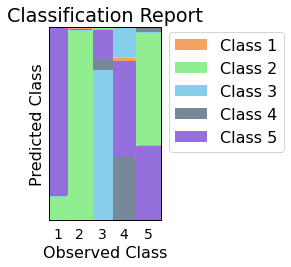

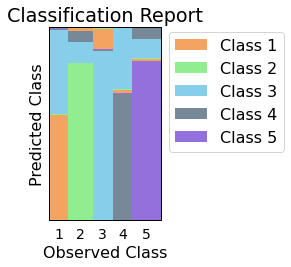

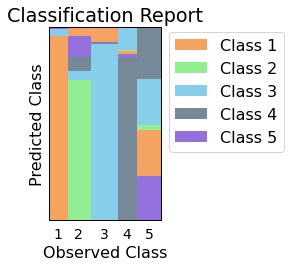

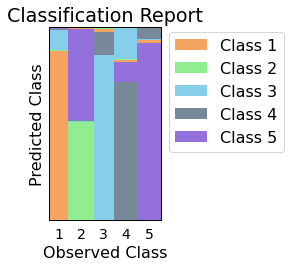

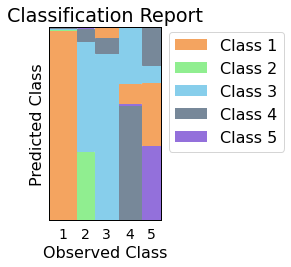

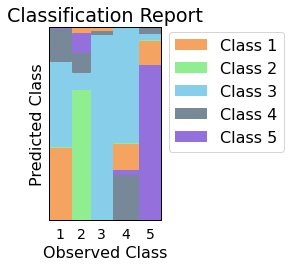

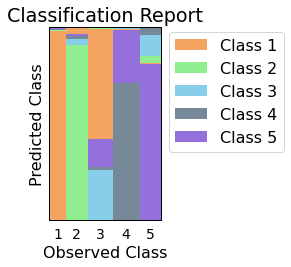

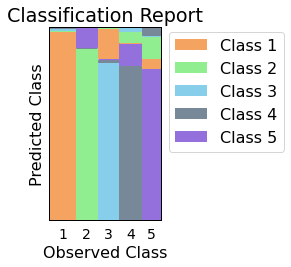

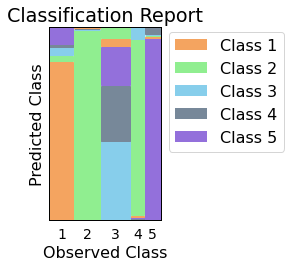

In [31]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [32]:
print(np.mean(scores1))
print(np.mean(scores2))

0.6649818248819156
0.6435747299399242


#### Random Forest

In [43]:
scores1 = []
scores2 = []
matrix = []

for i in df1['User'].unique():
    X_test = df1.drop('Class', axis=1)[df1['User'] == i]
    X_train = df1.drop('Class', axis=1)[df1['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df1['Class'][df1['User'] == i]
    y_train = df1['Class'][df1['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_matrix)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.8624005305039788
The f1 score for the User 0 is: 0.8625469172129456
[[1619   34  216    3    0]
 [   0 1351    0    1  149]
 [  22   15 1746   63    5]
 [  46    1  445 1228   61]
 [   0  100   33   51 1859]]


The accuracy score for the User 1 is: 0.8696205215179139
The f1 score for the User 1 is: 0.8667512859498527
[[1307    0    0    0    0]
 [   0  593    0   41  162]
 [  25    0  862   81    0]
 [   0    8    3  274  276]
 [   0    2    3   14 1066]]


The accuracy score for the User 2 is: 0.7456237536007091
The f1 score for the User 2 is: 0.6798513373223445
[[1194    0    4    0    0]
 [   0  719    0    0   89]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  693    6  355   55]]


The accuracy score for the User 5 is: 0.4497551420176298
The f1 score for the User 5 is: 0.3750144138318901
[[  0 431  25  14 350]
 [  0 658  22 420  43]
 [  0   0 920   6   0]
 [  0   0 979  54   0]
 [  0 519   0   0 664]]


The accuracy score fo

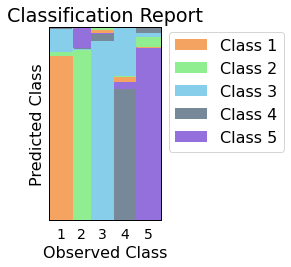

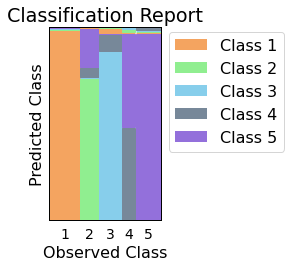

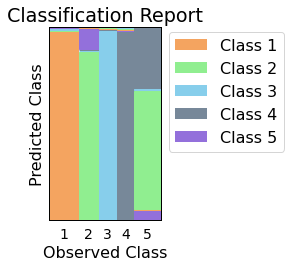

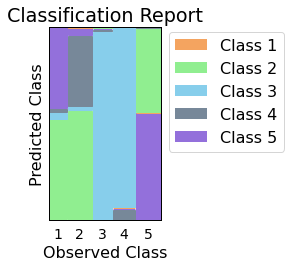

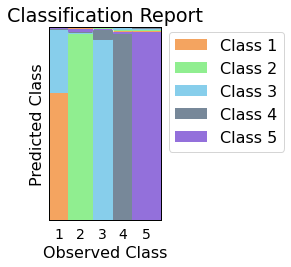

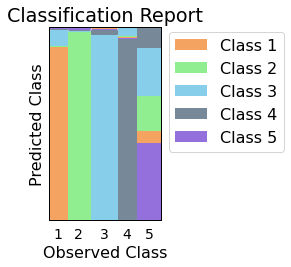

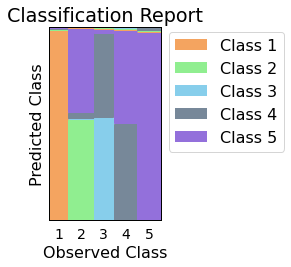

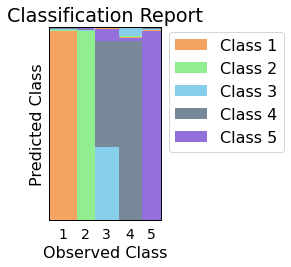

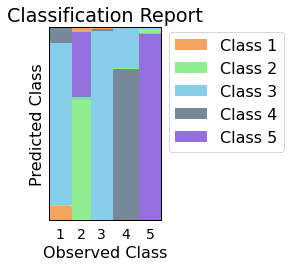

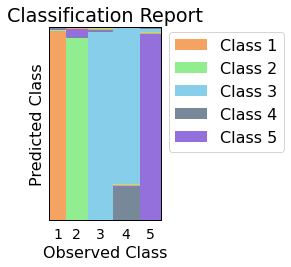

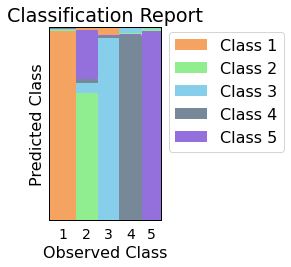

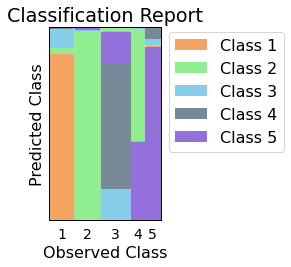

In [45]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [46]:
print(np.mean(scores1))
print(np.mean(scores2))

0.7731296789801309
0.7490440745272792


#### Lets remove the variables x10, y10, z10, x11, y11 and z11 as they have more than 80% of their values Null.

In [47]:
df2 = df1.drop(['X10','Y10','Z10','X11','Y11','Z11'], axis=1)
df2.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-26.389859,49.491094,93.828161,-19.384128,55.993694,92.20227,-22.500112,61.982886,84.745584,-26.820517


In [48]:
scores1 = []
scores2 = []
matrix = []

for i in df2['User'].unique():
    X_test = df2.drop('Class', axis=1)[df2['User'] == i]
    X_train = df2.drop('Class', axis=1)[df2['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df2['Class'][df2['User'] == i]
    y_train = df2['Class'][df2['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.8422855879752431
The f1 score for the User 0 is: 0.8428714007332763
[[1557   66  247    2    0]
 [   0 1187    0    0  314]
 [  13    6 1752   73    7]
 [  18    1  462 1246   54]
 [   1   74   35   54 1879]]


The accuracy score for the User 1 is: 0.8636845452618189
The f1 score for the User 1 is: 0.8604708715674512
[[1307    0    0    0    0]
 [   0  595    0   51  150]
 [  23    0  849   96    0]
 [   0   25    5  265  266]
 [   0    7    6   14 1058]]


The accuracy score for the User 2 is: 0.7296698426767118
The f1 score for the User 2 is: 0.6679442532298479
[[1195    0    3    0    0]
 [   0  659    0    0  149]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  747    5  315   42]]


The accuracy score for the User 5 is: 0.4595494613124388
The f1 score for the User 5 is: 0.3733155167398128
[[  0 540  15   5 260]
 [  0 808  30 246  59]
 [  0   0 921   5   0]
 [  0   0 994  39   0]
 [  0 605   0   0 578]]


The accuracy score fo

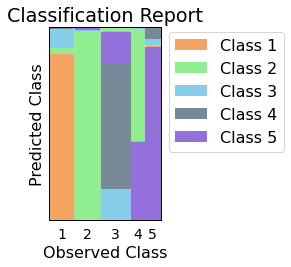

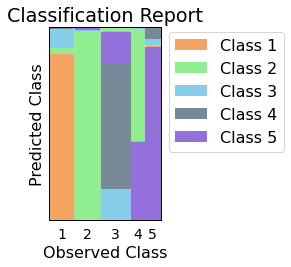

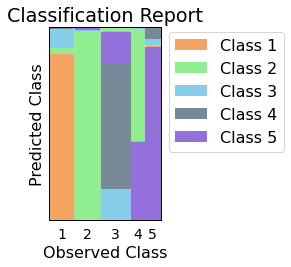

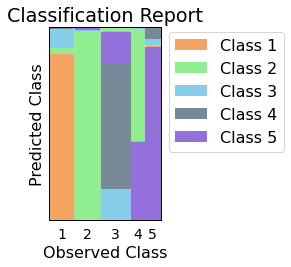

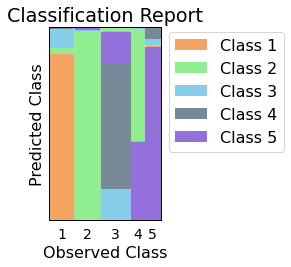

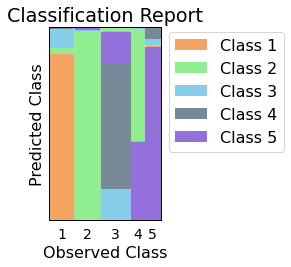

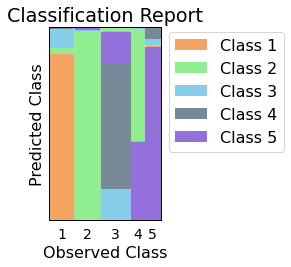

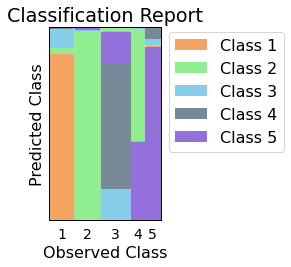

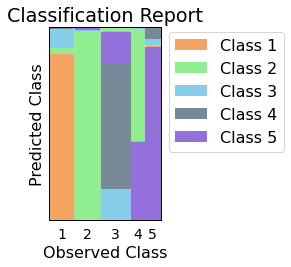

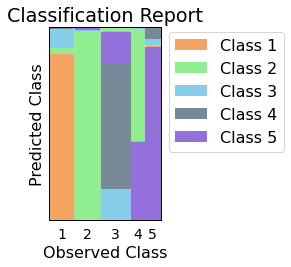

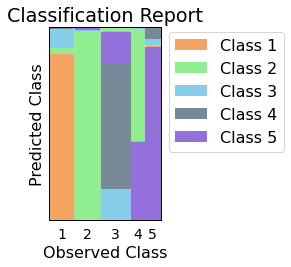

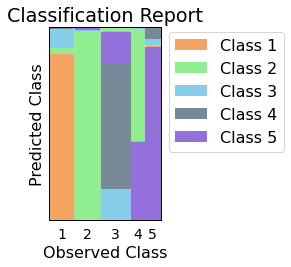

In [49]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [50]:
print(np.mean(scores1))
print(np.mean(scores2))

0.776550984370441
0.7517771724338695


In [51]:
df3 = df2.drop(['X9','Y9','Z9'], axis=1)

In [52]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3.drop('Class', axis=1)[df3['User'] == i]
    X_train = df3.drop('Class', axis=1)[df3['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3['Class'][df3['User'] == i]
    y_train = df3['Class'][df3['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_matrix)

The accuracy score for the User 0 is: 0.8461538461538461
The f1 score for the User 0 is: 0.8459735734949376
[[1554   72  244    2    0]
 [   0 1166    0    1  334]
 [  10    7 1748   63   23]
 [  62    0  443 1243   33]
 [   1   26   31   40 1945]]


The accuracy score for the User 1 is: 0.8505405978376086
The f1 score for the User 1 is: 0.8385689355949169
[[1307    0    0    0    0]
 [   0  629    0   24  143]
 [  23    0  846   99    0]
 [   0  170    7  168  216]
 [   0    8    5   10 1062]]


The accuracy score for the User 2 is: 0.718147573676047
The f1 score for the User 2 is: 0.6632056053677822
[[1195    0    3    0    0]
 [   0  649    0    0  159]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0 1086   10   13    0]]


The accuracy score for the User 5 is: 0.5406464250734574
The f1 score for the User 5 is: 0.42482768228803036
[[   0  434  126    1  259]
 [   0 1123   20    0    0]
 [   0    0  925    1    0]
 [   0    0 1023   10    0]
 [   0  481    0    0  702]

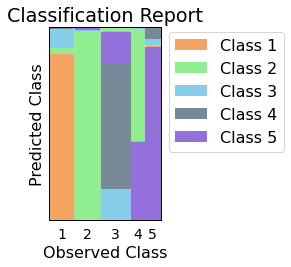

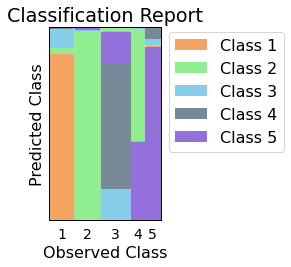

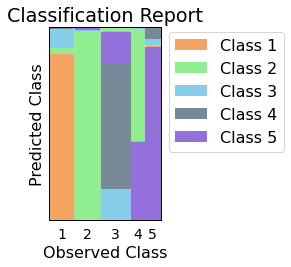

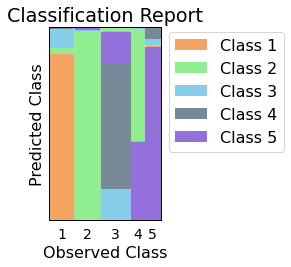

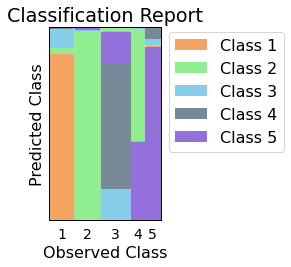

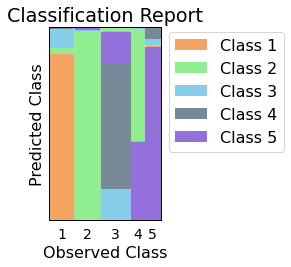

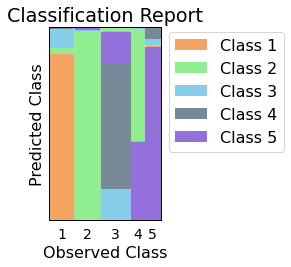

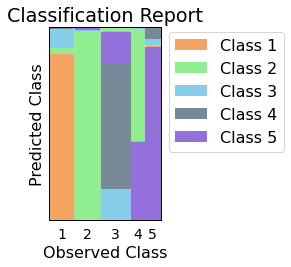

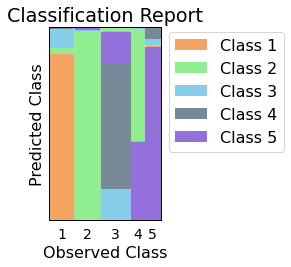

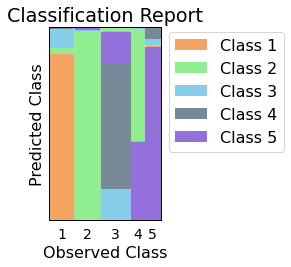

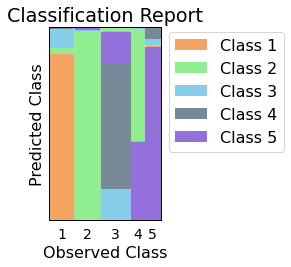

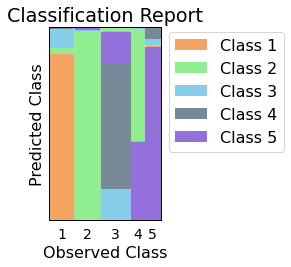

In [53]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [54]:
print(np.mean(scores1))
print(np.mean(scores2))

0.7779921970260926
0.7497211928687889


#### There is not much significant improvement in df4 so we will proceed with df3 as we do not want to lose a lot of data.

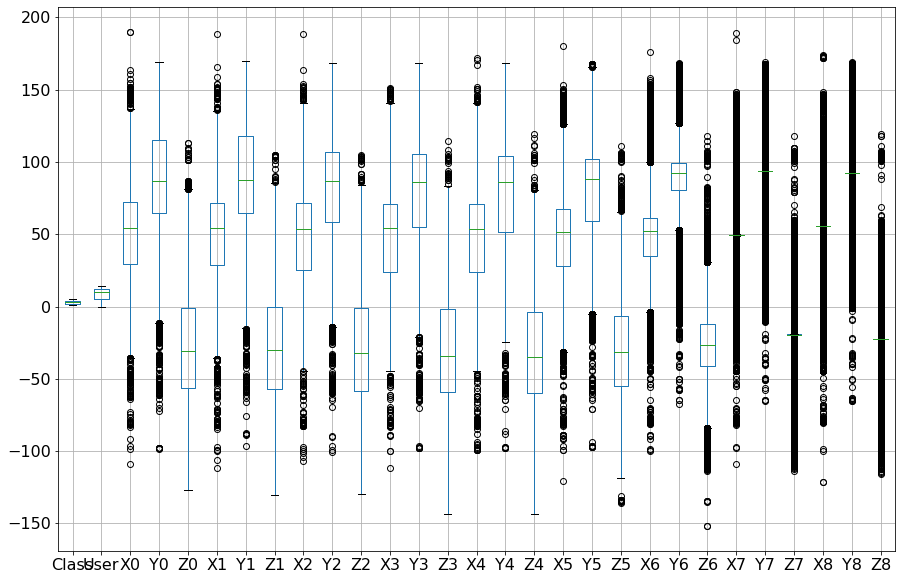

In [55]:
df3.boxplot(figsize=(15,10))
plt.show()

In [56]:
df3c = df3.copy()

df3c1 = df3c[df3c['Class']==1]
df3c2 = df3c[df3c['Class']==2]
df3c3 = df3c[df3c['Class']==3]
df3c4 = df3c[df3c['Class']==4]
df3c5 = df3c[df3c['Class']==5]

L = [df3c1, df3c2, df3c3, df3c4, df3c5]

In [57]:
for j in L:
    for i in (j.drop(['Class','User'], axis=1).columns):
        Q1 = j[i].quantile(0.25)
        Q3 = j[i].quantile(0.75)
        IQR = Q3 - Q1

        j[i][j[i]>(Q3+1.5*IQR)] = Q3
        j[i][j[i]<(Q1-1.5*IQR)] = Q1
        
df3c = pd.concat(L)

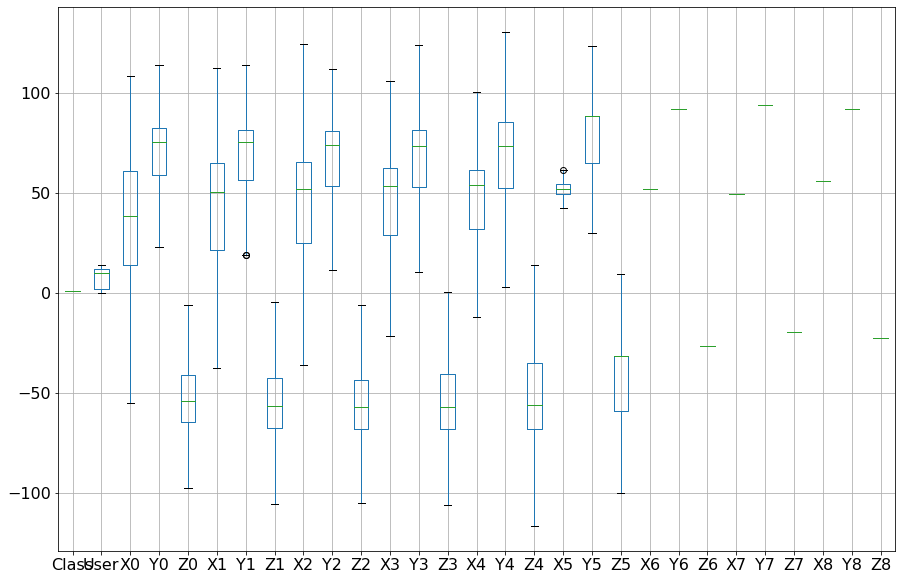

In [58]:
df3c1.boxplot(figsize=(15,10))
plt.show()

In [59]:
df3c = df3c.sample(frac = 1)

In [60]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8703580901856764
The f1 score for the User 0 is: 0.8695140262071337
[[1576  204   92    0    0]
 [   0 1285    0    0  216]
 [  43    0 1808    0    0]
 [  14    0  526 1240    1]
 [   3   10   19   45 1966]]


The accuracy score for the User 1 is: 0.9635361458554166
The f1 score for the User 1 is: 0.9625153542579509
[[1307    0    0    0    0]
 [   0  640    5   34  117]
 [   0    0  968    0    0]
 [   0    0    0  561    0]
 [   0   15    0    1 1069]]


The accuracy score for the User 2 is: 0.807888322623532
The f1 score for the User 2 is: 0.7859470556795604
[[1194    0    4    0    0]
 [   0  775    0    0   33]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  829    0    0  280]]


The accuracy score for the User 5 is: 0.8940254652301665
The f1 score for the User 5 is: 0.8919217978721601
[[ 593    0  218    9    0]
 [   0 1127    0    0   16]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  298    0    0  885]]

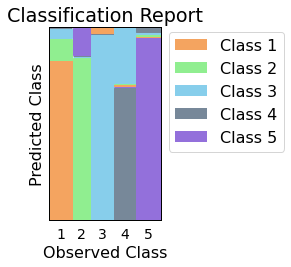

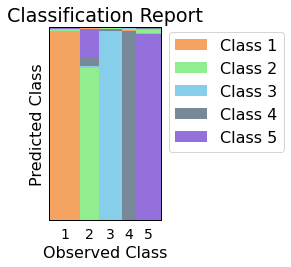

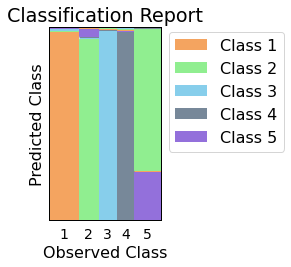

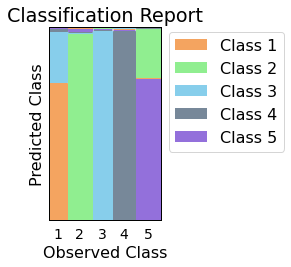

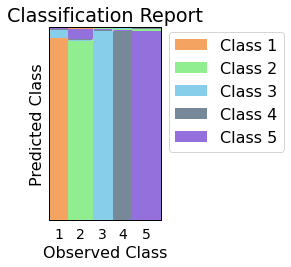

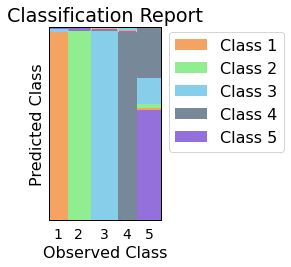

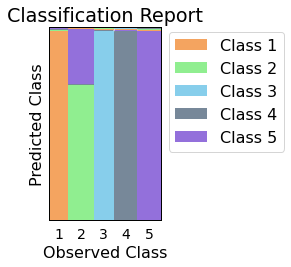

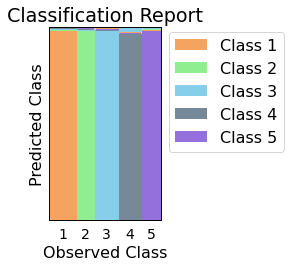

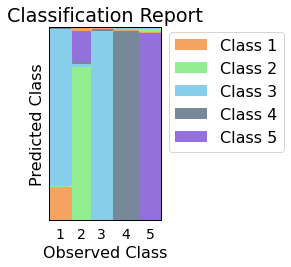

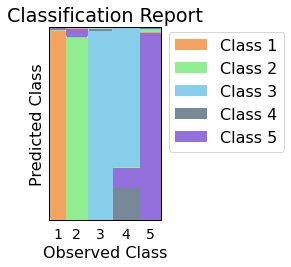

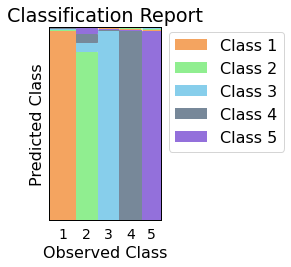

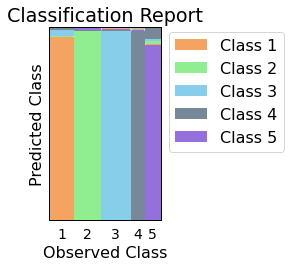

In [61]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [62]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9077964736482561
0.8983238838218099


#### Clearly a few users are performing very poorly in some cases. We can try dealing with a few users specially in the class they are performing poorly.

In [63]:
df4 = df3c.copy()
df4[df4['User']==2] = df4[df4['User']==2][df4['Class']!=5]
df4 = df4.dropna()

In [64]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df4.drop('Class', axis=1)[df4['User'] == i]
    X_train = df4.drop('Class', axis=1)[df4['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df4['Class'][df4['User'] == i]
    y_train = df4['Class'][df4['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8804155614500442
The f1 score for the User 0 is: 0.8803065783378644
[[1490  171  211    0    0]
 [   0 1462    0    0   39]
 [  44    0 1807    0    0]
 [  29    0  503 1245    4]
 [   0   23   19   39 1962]]


The accuracy score for the User 1 is: 0.9573881704473182
The f1 score for the User 1 is: 0.956535003600487
[[1307    0    0    0    0]
 [   0  646    9   26  115]
 [   0    0  968    0    0]
 [   0    0    0  561    0]
 [   0   47    0    4 1034]]


The accuracy score for the User 2 is: 0.9888366627497063
The f1 score for the User 2 is: 0.993303717011905
[[1192    0    6    0    0]
 [   0  777    0    0   31]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.8573947110675808
The f1 score for the User 5 is: 0.8515880116861334
[[ 582    0  204   34    0]
 [   0 1138    0    0    5]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  485    0    0  698]]


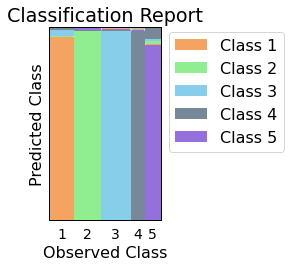

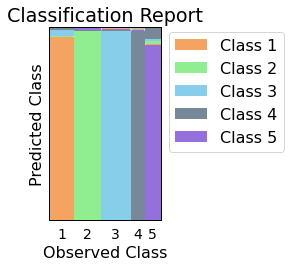

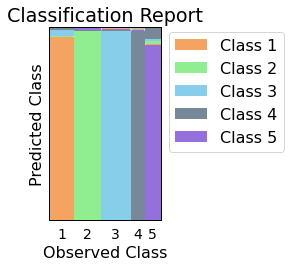

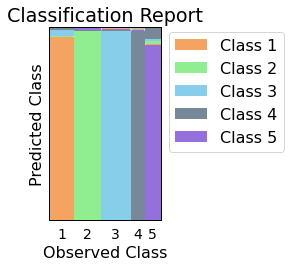

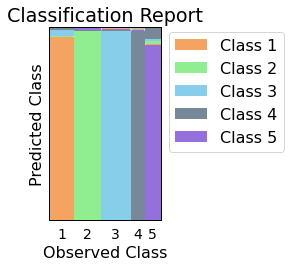

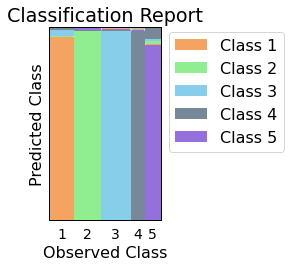

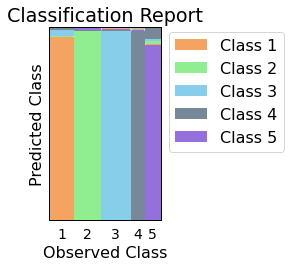

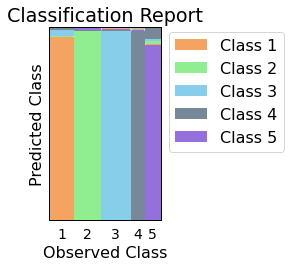

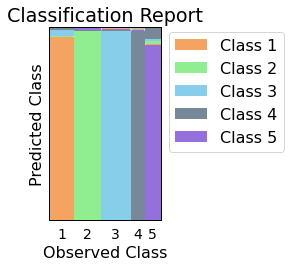

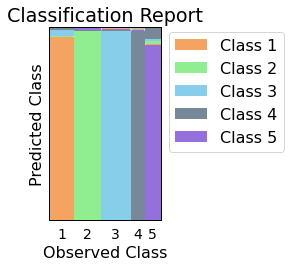

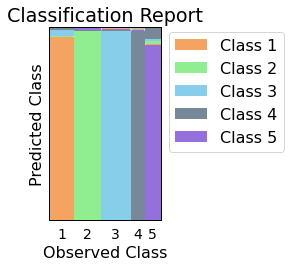

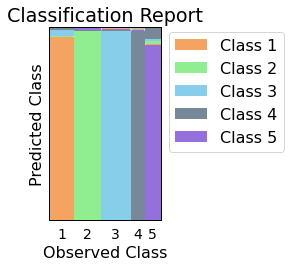

In [65]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [66]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9184142238090827
0.9098460986408664


In [67]:
df5 = df3c.copy()
df5[df5['User']==2] = df5[df5['User']==2][df5['Class']!=5]
df5[df5['User']==12] = df5[df5['User']==12][df5['Class']!=4]
df5 = df5.dropna()

In [68]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df5.drop('Class', axis=1)[df5['User'] == i]
    X_train = df5.drop('Class', axis=1)[df5['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df5['Class'][df5['User'] == i]
    y_train = df5['Class'][df5['User'] != i]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8873784261715296
The f1 score for the User 0 is: 0.8872840487759209
[[1533  165  174    0    0]
 [   0 1472    0    0   29]
 [  45    0 1806    0    0]
 [  28    0  489 1263    1]
 [   0   19   20   49 1955]]


The accuracy score for the User 1 is: 0.9584481662073352
The f1 score for the User 1 is: 0.9575515134128209
[[1307    0    0    0    0]
 [   0  641   29    0  126]
 [   0    0  968    0    0]
 [   0    0    0  561    0]
 [   0   40    0    1 1044]]


The accuracy score for the User 2 is: 0.9891304347826086
The f1 score for the User 2 is: 0.9935968504341489
[[1193    0    5    0    0]
 [   0  777    0    0   31]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.8938295788442703
The f1 score for the User 5 is: 0.8916079879065378
[[ 647    0  172    1    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  369    0    0  814]

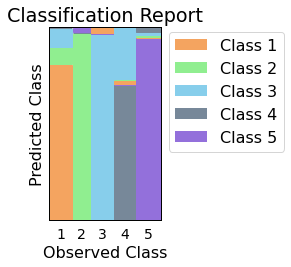

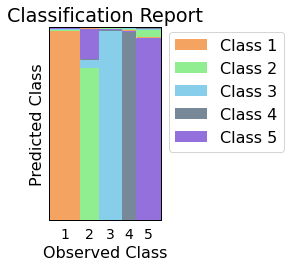

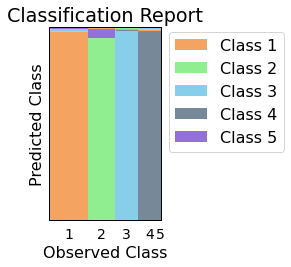

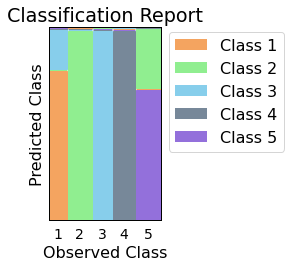

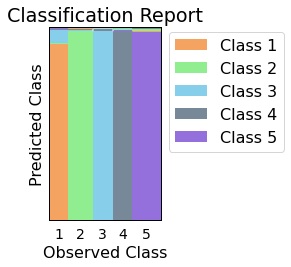

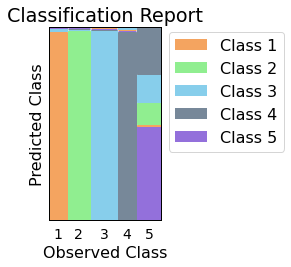

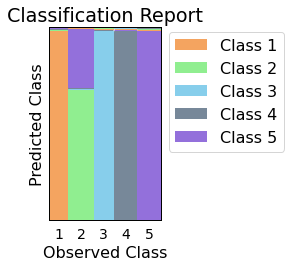

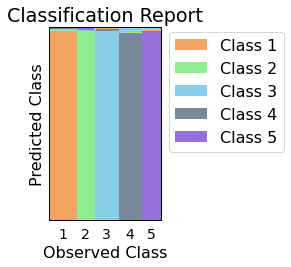

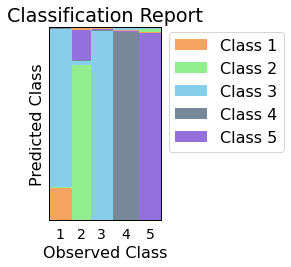

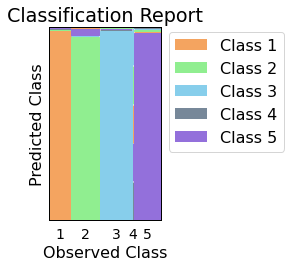

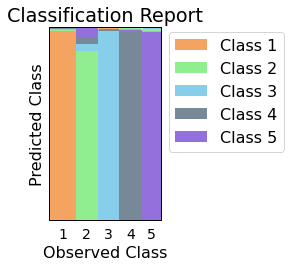

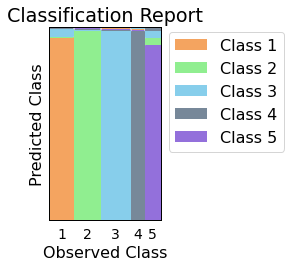

In [69]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [70]:
print(np.mean(scores1))
print(np.mean(scores2))

0.939559696490602
0.9356193122854336


In [71]:
print(np.mean(scores1))
print(np.mean(scores2))

0.939559696490602
0.9356193122854336


In [72]:
df5.shape, df3c.shape

((74903, 29), (77224, 29))

### Applying XGBoost:

In [73]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(conf_mat)
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8746684350132626
The f1 score for the User 0 is: 0.8727874018596986
[[1871    0    1    0    0]
 [   0 1347    0    0  154]
 [ 249    0 1602    0    0]
 [ 206    0  179 1263  133]
 [   8  147    8   49 1831]]


The accuracy score for the User 1 is: 0.9321602713589145
The f1 score for the User 1 is: 0.9314474236366383
[[1307    0    0    0    0]
 [   0  632    0   42  122]
 [  21    0  945    2    0]
 [   0    0    0  561    0]
 [   0  120    0   13  952]]


The accuracy score for the User 2 is: 0.7717704409483713
The f1 score for the User 2 is: 0.7233113563105804
[[1198    0    0    0    0]
 [   0  788    0    0   20]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0 1009    0    0  100]]


The accuracy score for the User 5 is: 0.879333986287953
The f1 score for the User 5 is: 0.8760550876223504
[[ 626    0  194    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  422    0    0  761]]

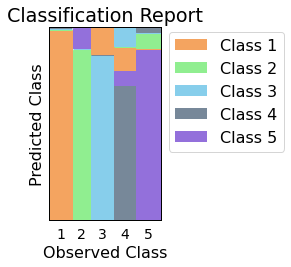

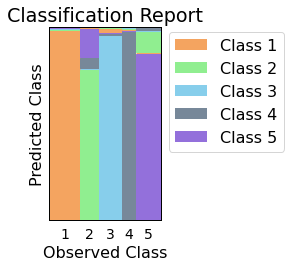

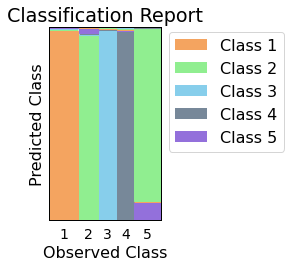

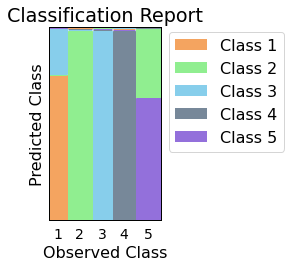

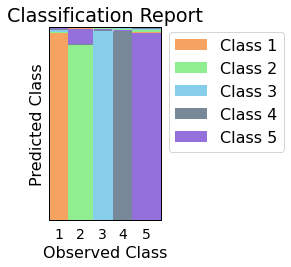

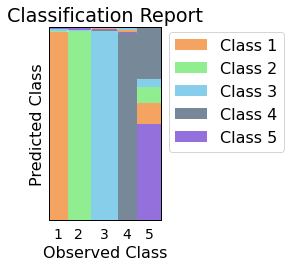

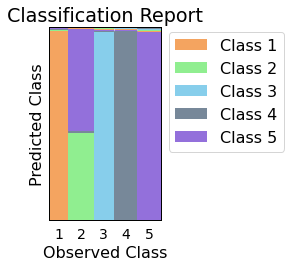

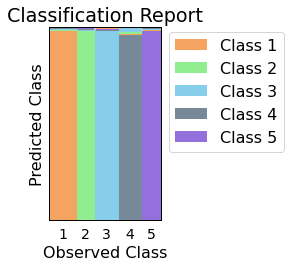

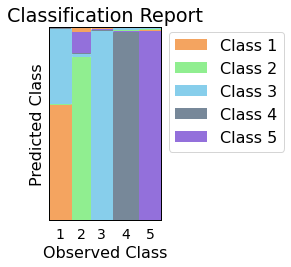

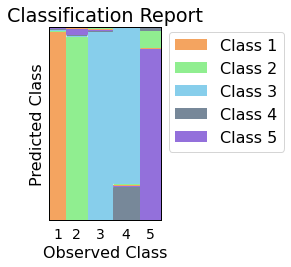

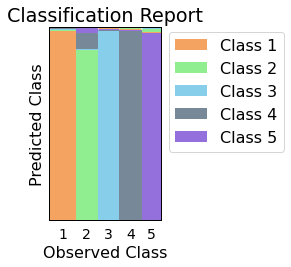

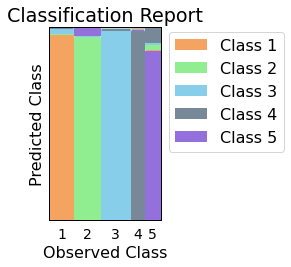

In [74]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [75]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9007505272116042
0.8908728002742919


In [76]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df5.drop('Class', axis=1)[df5['User'] == i]
    X_train = df5.drop('Class', axis=1)[df5['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df5['Class'][df5['User'] == i]
    y_train = df5['Class'][df5['User'] != i]
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.877763041556145
The f1 score for the User 0 is: 0.8745681416080013
[[1871    0    1    0    0]
 [   0 1464    0    0   37]
 [ 265    0 1586    0    0]
 [ 201    0  260 1193  127]
 [   7  155    7   46 1828]]


The accuracy score for the User 1 is: 0.8942124231503074
The f1 score for the User 1 is: 0.8938619092757518
[[1307    0    0    0    0]
 [   0  652   37    0  107]
 [  19    0  949    0    0]
 [   0    0    0  561    0]
 [   2  326    0    8  749]]


The accuracy score for the User 2 is: 0.9958871915393654
The f1 score for the User 2 is: 0.9977812171825242
[[1198    0    0    0    0]
 [   0  795    0    0   13]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.8669931439764936
The f1 score for the User 5 is: 0.8622804845664025
[[ 628    0  192    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  487    0    0  696]]

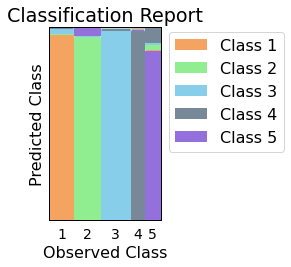

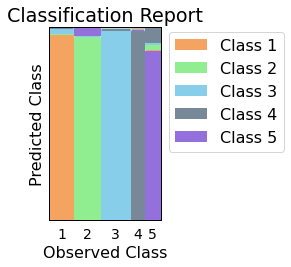

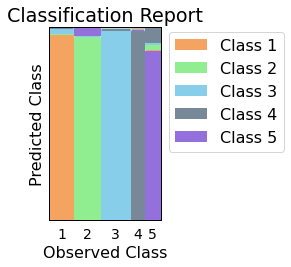

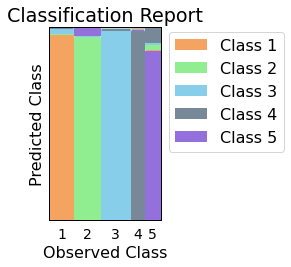

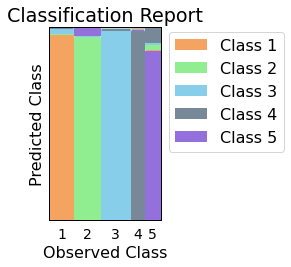

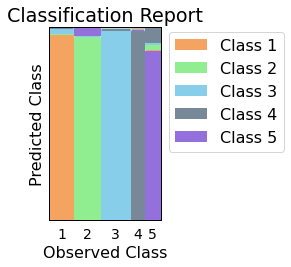

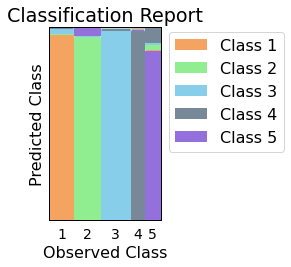

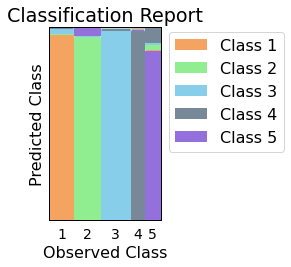

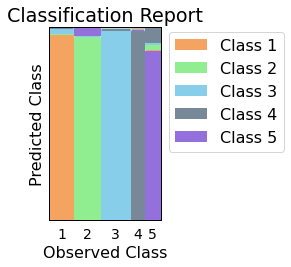

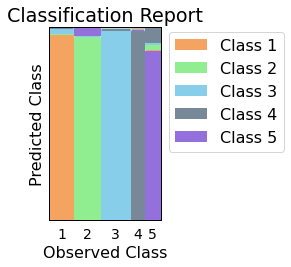

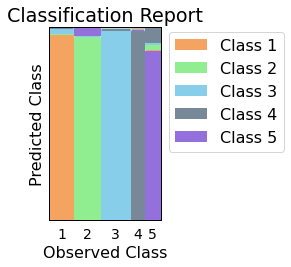

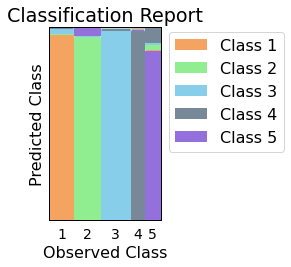

In [77]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [78]:
print(np.mean(scores1))
print(np.mean(scores2))

0.925855139483597
0.9207154991333842


### Support Vector Machines

In [79]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    sv.fit(X_train, y_train)
    
    y_pred = sv.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.8911361626878869
The f1 score for the User 0 is: 0.888002432592585
[[1865    0    7    0    0]
 [   0 1426    0    1   74]
 [  96    0 1755    0    0]
 [ 140   11   17 1158  455]
 [   0  104    0   80 1859]]


The accuracy score for the User 1 is: 0.9105363578545685
The f1 score for the User 1 is: 0.909848808913821
[[1307    0    0    0    0]
 [   0  688    0    0  108]
 [   0   21  947    0    0]
 [   0  180    3  373    5]
 [   0   17    6   82  980]]


The accuracy score for the User 2 is: 0.7722136051407046
The f1 score for the User 2 is: 0.7310134498280253
[[1198    0    0    0    0]
 [   0  761    0    0   47]
 [   0    0  721    0    0]
 [   0    0    0  677    0]
 [   0  980    0    1  128]]


The accuracy score for the User 5 is: 0.9212536728697356
The f1 score for the User 5 is: 0.9183792444578976
[[ 468    0  352    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0   37  996    0]
 [   0   13    0    0 1170]]


In [80]:
print(np.mean(scores1))
print(np.mean(scores2))

0.922314655130125
0.9179352903152301


In [81]:
df6 = df3c.copy()
df6[df6['User']==2] = df6[df6['User']==2][df6['Class']!=5]
df6 = df6.dropna()

In [82]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df6.drop('Class', axis=1)[df6['User'] == i]
    X_train = df6.drop('Class', axis=1)[df6['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df6['Class'][df6['User'] == i]
    y_train = df6['Class'][df6['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    sv.fit(X_train, y_train)
    
    y_pred = sv.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.89157824933687
The f1 score for the User 0 is: 0.8875618317904127
[[1865    0    7    0    0]
 [   0 1483    0    1   17]
 [  96    0 1755    0    0]
 [ 134   10   17 1134  486]
 [   0  131    0   82 1830]]


The accuracy score for the User 1 is: 0.888064447742209
The f1 score for the User 1 is: 0.8888586977417231
[[1307    0    0    0    0]
 [   0  697    0    0   99]
 [   0   21  947    0    0]
 [   0  179    3  379    0]
 [   0  105    4  117  859]]


The accuracy score for the User 2 is: 0.986192714453584
The f1 score for the User 2 is: 0.992889555945504
[[1198    0    0    0    0]
 [   0  761    0    0   47]
 [   0    0  721    0    0]
 [   0    0    0  677    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.9173359451518119
The f1 score for the User 5 is: 0.9144317566228378
[[ 467    0  353    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0   37  996    0]
 [   0   32    0    0 1151]]


T

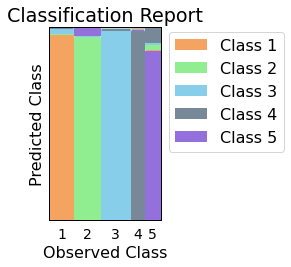

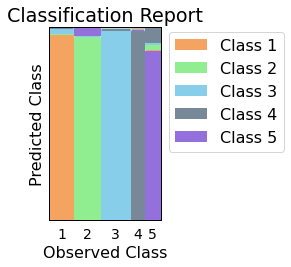

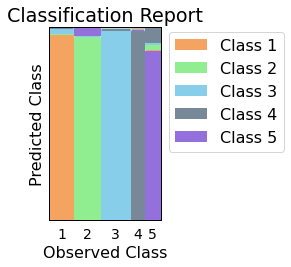

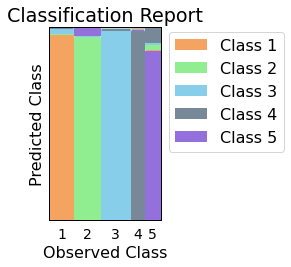

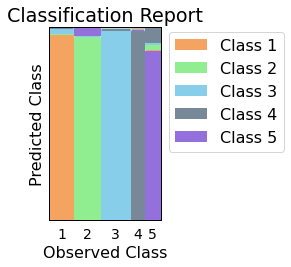

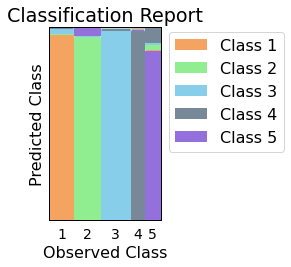

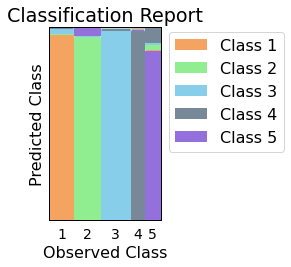

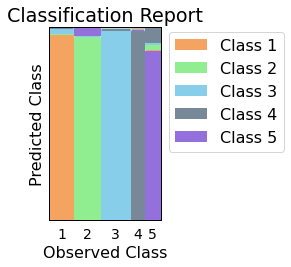

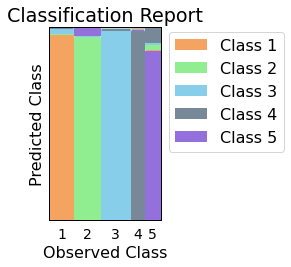

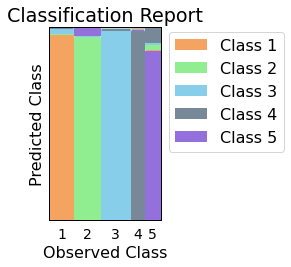

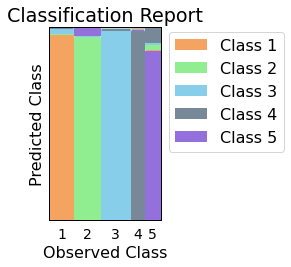

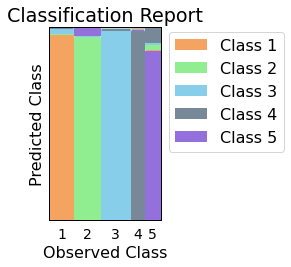

In [83]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [84]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9401763343034952
0.9397756345470838


### Voting Classifier

In [85]:
scores1 = []
scores2 = []
matrix = []

for i in df3['User'].unique():
    X_test = df3c.drop('Class', axis=1)[df3c['User'] == i]
    X_train = df3c.drop('Class', axis=1)[df3c['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df3c['Class'][df3c['User'] == i]
    y_train = df3c['Class'][df3c['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    
    clf = VotingClassifier(estimators=[('XGB', xgb), ('RF', rf), ('SVC', sv)],voting='hard')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.907051282051282
The f1 score for the User 0 is: 0.9045836840460275
[[1871    0    1    0    0]
 [   0 1378    0    0  123]
 [  58    0 1793    0    0]
 [ 198    0  268 1285   30]
 [   8   98    9   48 1880]]


The accuracy score for the User 1 is: 0.9616281534873861
The f1 score for the User 1 is: 0.9609238512949393
[[1307    0    0    0    0]
 [   0  659    0   33  104]
 [  15    0  953    0    0]
 [   0    0    0  561    0]
 [   0   24    0    5 1056]]


The accuracy score for the User 2 is: 0.7757589186793707
The f1 score for the User 2 is: 0.7308468431988097
[[1198    0    0    0    0]
 [   0  787    0    0   21]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0  990    0    0  119]]


The accuracy score for the User 5 is: 0.9104799216454457
The f1 score for the User 5 is: 0.9090259098813209
[[ 600    0  220    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  237    0    0  946]]

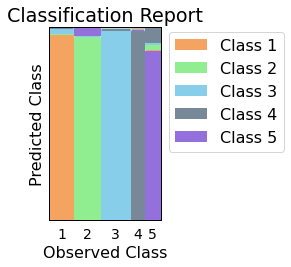

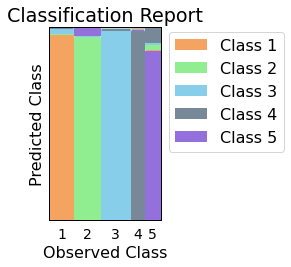

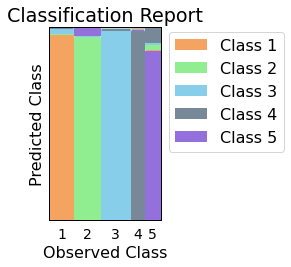

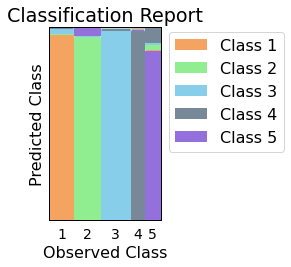

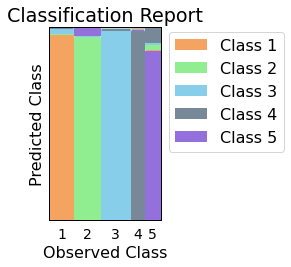

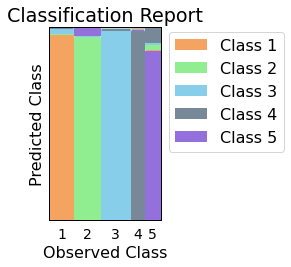

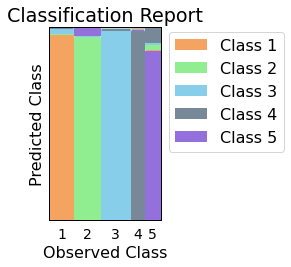

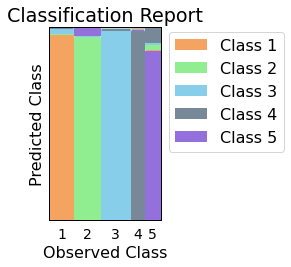

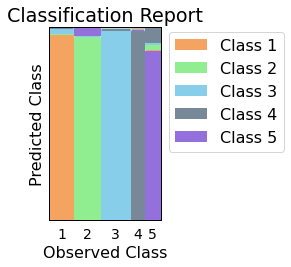

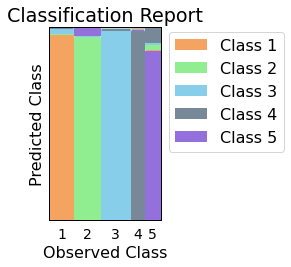

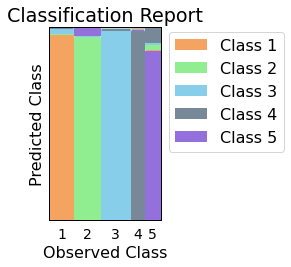

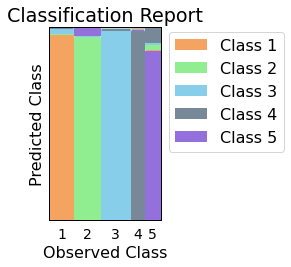

In [86]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [87]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9185878917320164
0.9101789547674689


In [88]:
scores1 = []
scores2 = []

for i in df3['User'].unique():
    X_test = df5.drop('Class', axis=1)[df5['User'] == i]
    X_train = df5.drop('Class', axis=1)[df5['User'] != i]
    
    X_test = X_test.drop('User', axis=1)
    X_train = X_train.drop('User', axis=1)
    
    y_test = df5['Class'][df5['User'] == i]
    y_train = df5['Class'][df5['User'] != i]
    
    sv = SVC(kernel='rbf', C=10, probability=True, decision_function_shape='ovo')
    rf = RandomForestClassifier(random_state=1)
    gb = GradientBoostingClassifier(random_state=1)
    
    clf = VotingClassifier(estimators=[('gb', gb), ('rf', rf), ('svc', sv)],voting='hard')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = f1_score(y_test, y_pred, average='weighted')
    
    print("The accuracy score for the User",i,"is:",score1)
    print("The f1 score for the User",i,"is:",score2)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    scores1.append(score1)
    scores2.append(score2)
    matrix.append(conf_mat)

The accuracy score for the User 0 is: 0.895999115826702
The f1 score for the User 0 is: 0.8902397771673106
[[1871    0    1    0    0]
 [   0 1490    0    0   11]
 [  67    0 1784    0    0]
 [ 489    0  132 1056  104]
 [   1   75    7   54 1906]]


The accuracy score for the User 1 is: 0.9355522577909688
The f1 score for the User 1 is: 0.9359888241014697
[[1307    0    0    0    0]
 [   0  681   11    0  104]
 [   0   16  952    0    0]
 [   0    0    0  561    0]
 [   0  172    0    1  912]]


The accuracy score for the User 2 is: 0.9932432432432432
The f1 score for the User 2 is: 0.9964301285630838
[[1198    0    0    0    0]
 [   0  786    0    0   22]
 [   0    0  721    0    0]
 [   0    0    1  676    0]
 [   0    0    0    0    0]]


The accuracy score for the User 5 is: 0.8904995102840353
The f1 score for the User 5 is: 0.8878925608518793
[[ 664    0  156    0    0]
 [   0 1143    0    0    0]
 [   0    0  926    0    0]
 [   0    0    0 1033    0]
 [   0  403    0    0  780]]

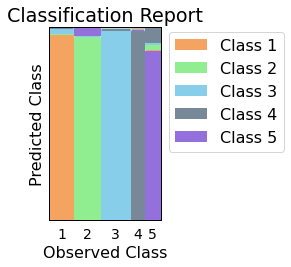

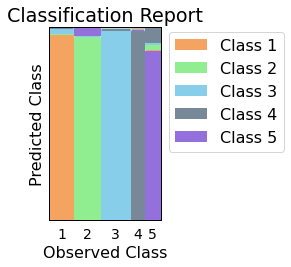

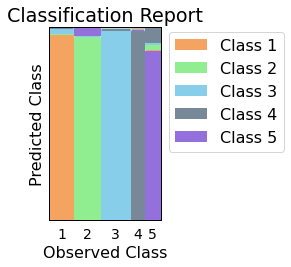

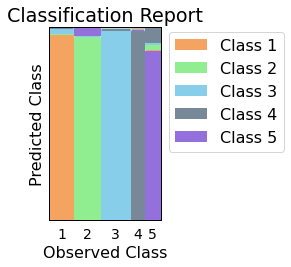

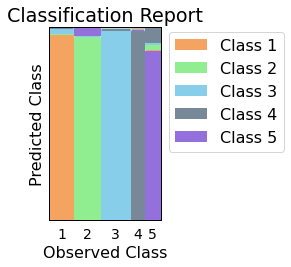

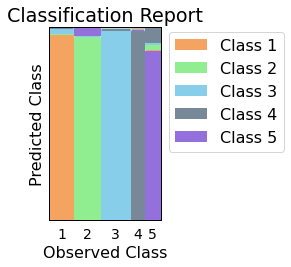

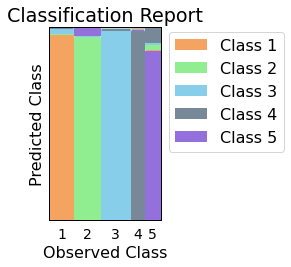

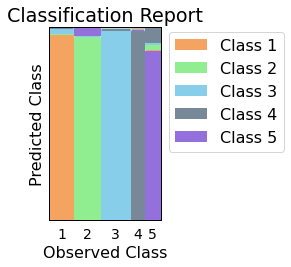

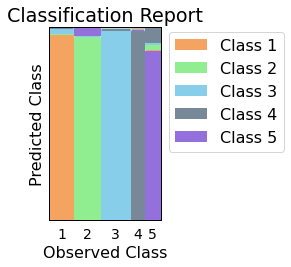

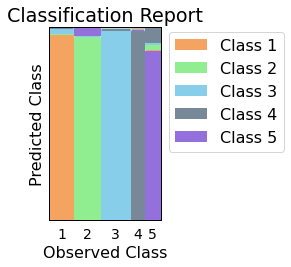

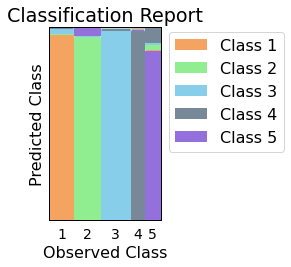

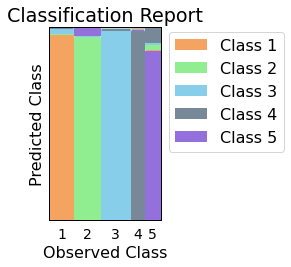

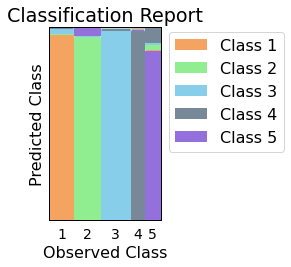

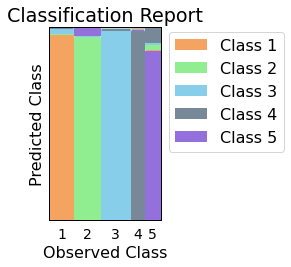

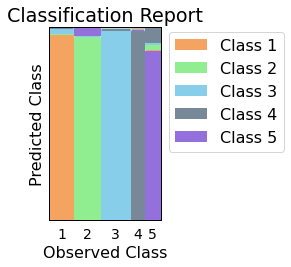

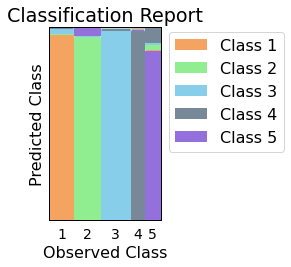

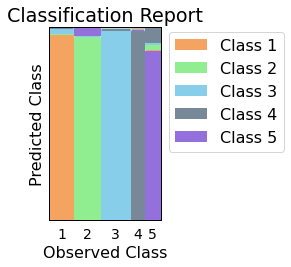

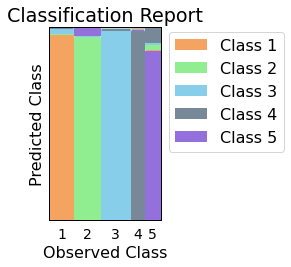

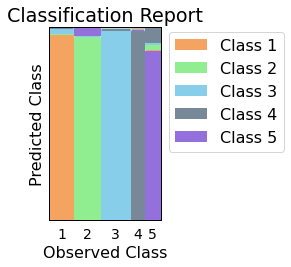

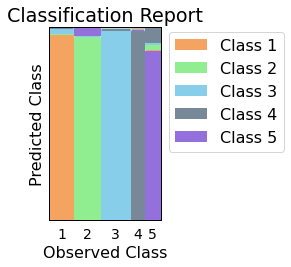

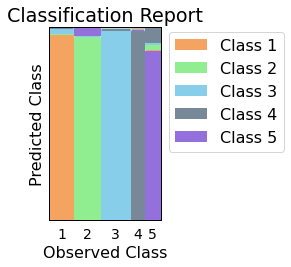

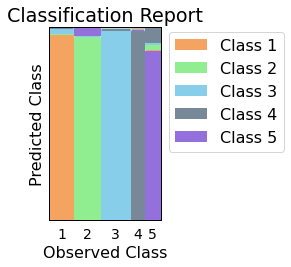

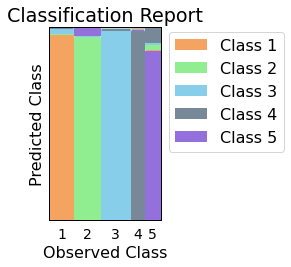

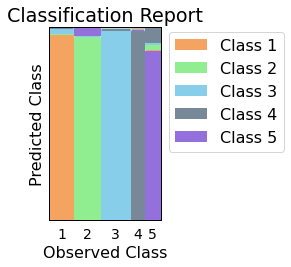

In [89]:
for i in range(len(matrix)):
    results = matrix[i]
    mosaic_plot(results)
plt.show()

In [90]:
print(np.mean(scores1))
print(np.mean(scores2))

0.9454739949959174
0.9430368968601542


In [91]:
df3c.shape, df5.shape, df6.shape

((77224, 29), (74903, 29), (76115, 29))